In [67]:
import pandas as pd

# Load the training dataset
train_data = pd.read_csv('fallreports_2023-9-21_train.csv')

# Load the test dataset
test_data = pd.read_csv('fallreports_2023-9-21_test.csv')

# Print the headers of the training dataset
print("Training Dataset Headers:", train_data.columns.tolist())

# Print the headers of the test dataset
print("\nTest Dataset Headers:", test_data.columns.tolist())


Training Dataset Headers: ['record_id', 'redcap_repeat_instrument', 'gender', 'race', 'ethnicity', 'education', 'age_at_enrollment', 'pd_duration', 'num_falls_6_mo', 'previous_falls', 'mds_updrs_iii_total_video', 'mds_updrs_iii_binary', 'mds_updrs_iii_hy_video', 'abc_total', 'moca_total', 'fog_q_class', 'minibestest_total', 'fall_study_day', 'fall_location', 'location_binary', 'fall_description', 'fall_class', 'fog_yn', 'fall_desc_repeat', 'aime2023_dataset', 'last_followup', 'fall_total', 'fall_rate', 'category']

Test Dataset Headers: ['record_id', 'redcap_repeat_instrument', 'gender', 'race', 'ethnicity', 'education', 'age_at_enrollment', 'pd_duration', 'num_falls_6_mo', 'previous_falls', 'mds_updrs_iii_total_video', 'mds_updrs_iii_binary', 'mds_updrs_iii_hy_video', 'abc_total', 'moca_total', 'fog_q_class', 'minibestest_total', 'fall_study_day', 'fall_location', 'location_binary', 'fall_description', 'fall_class', 'fog_yn', 'fall_desc_repeat', 'aime2023_dataset', 'last_followup', 'f

# PREPROCESSING

In [68]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import string



import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [113]:

# Loading the data
def load_data(train_path, test_path):
    train_data = pd.read_csv(train_path)
    test_data = pd.read_csv(test_path)
    return train_data, test_data

# Text preprocessing
def preprocess_text(text):
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Stopwords removal
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    return ' '.join(tokens)

# Load data
train_data, test_data = load_data('fallreports_2023-9-21_train.csv', 'fallreports_2023-9-21_test.csv')

# Apply preprocessing
train_data['preprocessed_description'] = train_data['fall_description'].apply(preprocess_text)
test_data['preprocessed_description'] = test_data['fall_description'].apply(preprocess_text)

# Splitting data into X and y
X_train_full = train_data['preprocessed_description']
y_train_full = train_data['fog_q_class']
X_test = test_data['preprocessed_description']
y_test = test_data['fog_q_class']

# Splitting training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)


In [12]:

# 1. Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 most frequent words for simplicity
X_train_tfidf = vectorizer.fit_transform(train_data['preprocessed_description'])
X_test_tfidf = vectorizer.transform(test_data['preprocessed_description'])

# Splitting the data into train and validation sets
y_train = train_data['fog_q_class']  # Replace 'target_column' with the name of your target column
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=1)

# 2. Train a classifier
clf = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
clf.fit(X_train, y_train)

# 3. Evaluate the classifier
y_pred_val = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

# Optionally, you can also evaluate on the test data
y_test = test_data['fog_q_class']  # Replace 'target_column' with the name of your target column
y_pred_test = clf.predict(X_test_tfidf)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Validation Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.61      0.88      0.72        26
           1       0.86      0.56      0.68        34

    accuracy                           0.70        60
   macro avg       0.73      0.72      0.70        60
weighted avg       0.75      0.70      0.70        60

Test Accuracy: 0.704225352112676
              precision    recall  f1-score   support

           0       0.65      0.89      0.75        36
           1       0.82      0.51      0.63        35

    accuracy                           0.70        71
   macro avg       0.74      0.70      0.69        71
weighted avg       0.73      0.70      0.69        71



In [156]:
import nltk
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have preprocessed train_data and test_data loaded from earlier

# 1. Preprocessing with WordNet Enhancement
def get_hypernym(word):
    """Get the most common hypernym for a word."""
    synsets = wn.synsets(word)
    if synsets:
        hypernyms = synsets[0].hypernyms()
        if hypernyms:
            return hypernyms[0].lemma_names()[0]
    return word

def preprocess_with_wordnet(text):
    tokens = nltk.word_tokenize(text)
    tokens = [get_hypernym(word) for word in tokens]
    return ' '.join(tokens)

train_data['wordnet_description'] = train_data['preprocessed_description'].apply(preprocess_with_wordnet)
test_data['wordnet_description'] = test_data['preprocessed_description'].apply(preprocess_with_wordnet)

# 2. Bag-of-Words (BoW) Vectorization
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['wordnet_description'])
X_test_bow = bow_vectorizer.transform(test_data['wordnet_description'])

# 3. TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['wordnet_description'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['wordnet_description'])

# 4. Train and evaluate the classifier
y_train = train_data['fog_q_class'] 
y_test = test_data['fog_q_class']

# For BoW
X_train, X_val, y_train_bow, y_val_bow = train_test_split(X_train_bow, y_train, test_size=0.2, random_state=1)
clf_bow = LogisticRegression(max_iter=5000)
clf_bow.fit(X_train, y_train_bow)
y_pred_val_bow = clf_bow.predict(X_val)
y_pred_test_bow = clf_bow.predict(X_test_bow)

print("BoW Validation Accuracy:", accuracy_score(y_val_bow, y_pred_val_bow))
print("BoW Test Accuracy:", accuracy_score(y_test, y_pred_test_bow))

# For TF-IDF
X_train, X_val, y_train_tfidf, y_val_tfidf = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=1)
clf_tfidf = LogisticRegression(max_iter=5000)
clf_tfidf.fit(X_train, y_train_tfidf)
y_pred_val_tfidf = clf_tfidf.predict(X_val)
y_pred_test_tfidf = clf_tfidf.predict(X_test_tfidf)

print("TF-IDF Validation Accuracy:", accuracy_score(y_val_tfidf, y_pred_val_tfidf))
print("TF-IDF Test Accuracy:", accuracy_score(y_test, y_pred_test_tfidf))

print(train_data['wordnet_description'].head(5))
print(test_data['wordnet_description'].head(5))


BoW Validation Accuracy: 0.7
BoW Test Accuracy: 0.7183098591549296
TF-IDF Validation Accuracy: 0.65
TF-IDF Test Accuracy: 0.7464788732394366
0    case walk journey collection plant_organ side ...
1    case limit basketball_player electronic_equipm...
2    case site opening building_complex rhododendro...
3    case locomotion toward room tabl people balanc...
4    case residence dramatic_composition drawback y...
Name: wordnet_description, dtype: object
0    case tri maneuver body_part kept shift animal_...
1    case curve abstinence around limit walker act ...
2    case support activity room troubl support hoop...
3    case leav parti person hous tri return abstrac...
4    case support pause elev abstraction limb Grego...
Name: wordnet_description, dtype: object


# Implement an automatic classifier

In [157]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, f1_score


# 2. Define the classifiers
kernels = ['linear', 'rbf']

clfs_bow = {}
clfs_tfidf = {}

for kernel in kernels:
    clfs_bow[kernel] = Pipeline([
        ('vectorizer', CountVectorizer(max_features=5000)),
        ('classifier', SVC(kernel=kernel, probability=True))
    ])

    clfs_tfidf[kernel] = Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', SVC(kernel=kernel, probability=True))
    ])

# 3. Train the classifiers on the preprocessed data
for kernel in kernels:
    clfs_bow[kernel].fit(train_data['wordnet_description'], train_data['fog_q_class'])
    clfs_tfidf[kernel].fit(train_data['wordnet_description'], train_data['fog_q_class'])
# After training the classifiers
print("Inspecting WordNet-enhanced output:")
print(train_data['wordnet_description'].head(5))
print("\n" + "="*50 + "\n")

# Then, continue with the evaluation of classifiers as in your original code
...

# 4. Evaluate the classifiers
for kernel in kernels:
    y_pred_bow = clfs_bow[kernel].predict(test_data['wordnet_description'])
    y_pred_tfidf = clfs_tfidf[kernel].predict(test_data['wordnet_description'])

    print(f"Kernel: {kernel}")
    print("\nBoW Test Metrics using SVM:")
    print("Accuracy:", accuracy_score(test_data['fog_q_class'], y_pred_bow))
    print("F1 Score (micro):", f1_score(test_data['fog_q_class'], y_pred_bow, average='micro'))
    print("F1 Score (macro):", f1_score(test_data['fog_q_class'], y_pred_bow, average='macro'))
    print(classification_report(test_data['fog_q_class'], y_pred_bow))

    print("\nTF-IDF Test Metrics using SVM:")
    print("Accuracy:", accuracy_score(test_data['fog_q_class'], y_pred_tfidf))
    print("F1 Score (micro):", f1_score(test_data['fog_q_class'], y_pred_tfidf, average='micro'))
    print("F1 Score (macro):", f1_score(test_data['fog_q_class'], y_pred_tfidf, average='macro'))
    print(classification_report(test_data['fog_q_class'], y_pred_tfidf))
    print("\n" + "="*50 + "\n")

# Inspect WordNet-enhanced output
print("Inspecting WordNet-enhanced output:")
print(train_data['wordnet_description'].head(5))
print("\n" + "="*50 + "\n")

# 4. Evaluate the classifiers
for kernel in kernels:
    y_pred_bow = clfs_bow[kernel].predict(test_data['wordnet_description'])
    y_pred_tfidf = clfs_tfidf[kernel].predict(test_data['wordnet_description'])

    print(f"Kernel: {kernel}")
    print("\nBoW Test Metrics using SVM:")
    print("Accuracy:", accuracy_score(test_data['fog_q_class'], y_pred_bow))
    print("F1 Score (micro):", f1_score(test_data['fog_q_class'], y_pred_bow, average='micro'))
    print("F1 Score (macro):", f1_score(test_data['fog_q_class'], y_pred_bow, average='macro'))
    print(classification_report(test_data['fog_q_class'], y_pred_bow))

    print("\nTF-IDF Test Metrics using SVM:")
    print("Accuracy:", accuracy_score(test_data['fog_q_class'], y_pred_tfidf))
    print("F1 Score (micro):", f1_score(test_data['fog_q_class'], y_pred_tfidf, average='micro'))
    print("F1 Score (macro):", f1_score(test_data['fog_q_class'], y_pred_tfidf, average='macro'))
    print(classification_report(test_data['fog_q_class'], y_pred_tfidf))
    print("\n" + "="*50 + "\n")




   

Inspecting WordNet-enhanced output:
0    case walk journey collection plant_organ side ...
1    case limit basketball_player electronic_equipm...
2    case site opening building_complex rhododendro...
3    case locomotion toward room tabl people balanc...
4    case residence dramatic_composition drawback y...
Name: wordnet_description, dtype: object


Kernel: linear

BoW Test Metrics using SVM:
Accuracy: 0.7746478873239436
F1 Score (micro): 0.7746478873239436
F1 Score (macro): 0.7746031746031746
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        36
           1       0.76      0.80      0.78        35

    accuracy                           0.77        71
   macro avg       0.78      0.78      0.77        71
weighted avg       0.78      0.77      0.77        71


TF-IDF Test Metrics using SVM:
Accuracy: 0.7183098591549296
F1 Score (micro): 0.7183098591549296
F1 Score (macro): 0.7182539682539683
              precision    recall  f1

# Cross-validate on the training set

In [72]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Number of splits
n_splits = 5
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

# Define the classifiers
kernels = ['linear', 'rbf']

clfs_bow = {}
clfs_tfidf = {}

for kernel in kernels:
    clfs_bow[kernel] = Pipeline([
        ('vectorizer', CountVectorizer(max_features=5000)),
        ('classifier', SVC(kernel=kernel, probability=True))
    ])

    clfs_tfidf[kernel] = Pipeline([
        ('vectorizer', TfidfVectorizer(max_features=5000)),
        ('classifier', SVC(kernel=kernel, probability=True))
    ])

# Cross-validate the classifiers on the preprocessed data
for kernel in kernels:
    scores_bow = cross_val_score(clfs_bow[kernel], train_data['wordnet_description'], train_data['fog_q_class'], cv=kfold, scoring='accuracy')
    scores_tfidf = cross_val_score(clfs_tfidf[kernel], train_data['wordnet_description'], train_data['fog_q_class'], cv=kfold, scoring='accuracy')

    print(f"Kernel: {kernel}")
    print("\nBoW Cross-Validation Accuracy Scores:", scores_bow)
    print("Average BoW Cross-Validation Accuracy:", scores_bow.mean())
    print("Standard Deviation:", scores_bow.std())

    print("\nTF-IDF Cross-Validation Accuracy Scores:", scores_tfidf)
    print("Average TF-IDF Cross-Validation Accuracy:", scores_tfidf.mean())
    print("Standard Deviation:", scores_tfidf.std())
    print("\n" + "="*50 + "\n")

    # Cross-validate the classifiers on the WordNet-enhanced data
for kernel in kernels:
    scores_bow_wordnet = cross_val_score(clfs_bow[kernel], train_data['wordnet_description'], train_data['fog_q_class'], cv=kfold, scoring='accuracy')
    scores_tfidf_wordnet = cross_val_score(clfs_tfidf[kernel], train_data['wordnet_description'], train_data['fog_q_class'], cv=kfold, scoring='accuracy')
    
    print(f"Kernel: {kernel} using WordNet-enhanced data")
    print("\nBoW Cross-Validation Accuracy Scores:", scores_bow_wordnet)
    print("Average BoW Cross-Validation Accuracy:", scores_bow_wordnet.mean())
    print("Standard Deviation:", scores_bow_wordnet.std())
    
    print("\nTF-IDF Cross-Validation Accuracy Scores:", scores_tfidf_wordnet)
    print("Average TF-IDF Cross-Validation Accuracy:", scores_tfidf_wordnet.mean())
    print("Standard Deviation:", scores_tfidf_wordnet.std())
    print("\n" + "="*50 + "\n")


Kernel: linear

BoW Cross-Validation Accuracy Scores: [0.75       0.76666667 0.71666667 0.85       0.74576271]
Average BoW Cross-Validation Accuracy: 0.7658192090395481
Standard Deviation: 0.04506796340295029

TF-IDF Cross-Validation Accuracy Scores: [0.83333333 0.78333333 0.71666667 0.86666667 0.74576271]
Average TF-IDF Cross-Validation Accuracy: 0.7891525423728813
Standard Deviation: 0.05501113435881953


Kernel: rbf

BoW Cross-Validation Accuracy Scores: [0.75       0.8        0.65       0.76666667 0.76271186]
Average BoW Cross-Validation Accuracy: 0.7458757062146892
Standard Deviation: 0.05070368877771393

TF-IDF Cross-Validation Accuracy Scores: [0.83333333 0.78333333 0.68333333 0.81666667 0.77966102]
Average TF-IDF Cross-Validation Accuracy: 0.7792655367231638
Standard Deviation: 0.052042025657017044


Kernel: linear using WordNet-enhanced data

BoW Cross-Validation Accuracy Scores: [0.75       0.76666667 0.71666667 0.85       0.74576271]
Average BoW Cross-Validation Accuracy: 0.

# Tune hyperparameters

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'linear']
}




# Define multiple scoring metrics
scoring_metrics = ['accuracy', 'f1_micro', 'f1_macro']

# Modify the grid search to use multiple scoring metrics
grid_search_bow = GridSearchCV(clfs_bow['rbf'], param_grid, cv=kfold, scoring=scoring_metrics, refit='accuracy', verbose=2, n_jobs=-1)
grid_search_tfidf = GridSearchCV(clfs_tfidf['rbf'], param_grid, cv=kfold, scoring=scoring_metrics, refit='accuracy', verbose=2, n_jobs=-1)


# Inspect the WordNet-enhanced output
print("Inspecting WordNet-enhanced output:")
print(train_data['wordnet_description'].head(5))
print("\n" + "="*50 + "\n")


# Conduct the grid search for BoW vectorization
grid_search_bow.fit(train_data['wordnet_description'], train_data['fog_q_class'])
grid_search_bow.fit(train_data['wordnet_description'], train_data['fog_q_class'])
best_params_bow = grid_search_bow.best_params_

print("Best Parameters for BoW:", best_params_bow)
print("Best Cross-Validation Score (Accuracy) for BoW:", grid_search_bow.best_score_)
print("Best Cross-Validation Score (F1 Micro) for BoW:", grid_search_bow.cv_results_['mean_test_f1_micro'][grid_search_bow.best_index_])
print("Best Cross-Validation Score (F1 Macro) for BoW:", grid_search_bow.cv_results_['mean_test_f1_macro'][grid_search_bow.best_index_])

# Conduct the grid search for TF-IDF vectorization
grid_search_tfidf.fit(train_data['wordnet_description'], train_data['fog_q_class'])
grid_search_tfidf.fit(train_data['wordnet_description'], train_data['fog_q_class'])
best_params_tfidf = grid_search_tfidf.best_params_

print("\nBest Parameters for TF-IDF:", best_params_tfidf)
print("Best Cross-Validation Score (Accuracy) for TF-IDF:", grid_search_tfidf.best_score_)
print("Best Cross-Validation Score (F1 Micro) for TF-IDF:", grid_search_tfidf.cv_results_['mean_test_f1_micro'][grid_search_tfidf.best_index_])
print("Best Cross-Validation Score (F1 Macro) for TF-IDF:", grid_search_tfidf.cv_results_['mean_test_f1_macro'][grid_search_tfidf.best_index_])




Inspecting WordNet-enhanced output:
0    case walk journey collection plant_organ side ...
1    case limit basketball_player electronic_equipm...
2    case site opening building_complex rhododendro...
3    case locomotion toward room tabl people balanc...
4    case residence dramatic_composition drawback y...
Name: wordnet_description, dtype: object


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for BoW: {'classifier__C': 0.1, 'classifier__gamma': 1, 'classifier__kernel': 'linear'}
Best Cross-Validation Score (Accuracy) for BoW: 0.776045197740113
Best Cross-Validation Score (F1 Micro) for BoW: 0.776045197740113
Best Cross-Validation Score (F1 Macro) for BoW: 0.7733169505467492
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters for TF-IDF: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kern

# Compare at least 5 classifiers + a Naive Bayes baseline

In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming data is loaded and preprocessed
# Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(train_data['preprocessed_description'])
X_val = tfidf_vectorizer.transform(test_data['preprocessed_description'])
y_train = train_data['fog_q_class']
y_val = test_data['fog_q_class']

# Initializing the models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


# Dataframe to store results
results_df = pd.DataFrame(columns=["Model", "Accuracy", "F1 Micro", "F1 Macro"])

# Train, predict, and evaluate
for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, predictions)
    f1_micro = f1_score(y_val, predictions, average='micro')
    f1_macro = f1_score(y_val, predictions, average='macro')
    
    results_df.loc[idx] = [name, accuracy, f1_micro, f1_macro]
    
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy)
    print("F1 Micro:", f1_micro)
    print("F1 Macro:", f1_macro)
    print(classification_report(y_val, predictions))

# Save to CSV
results_df.to_csv('model_comparison_results.csv', index=False)



Model: Naive Bayes
Accuracy: 0.7323943661971831
F1 Micro: 0.7323943661971831
F1 Macro: 0.7289531846493873
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        36
           1       0.79      0.63      0.70        35

    accuracy                           0.73        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.74      0.73      0.73        71


Model: Logistic Regression
Accuracy: 0.7323943661971831
F1 Micro: 0.7323943661971831
F1 Macro: 0.7269783444646833
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        36
           1       0.81      0.60      0.69        35

    accuracy                           0.73        71
   macro avg       0.75      0.73      0.73        71
weighted avg       0.75      0.73      0.73        71


Model: SVM (Linear Kernel)
Accuracy: 0.7464788732394366
F1 Micro: 0.7464788732394367
F1 Macro: 0.7464285714285714
         

In [74]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Assuming data is loaded and preprocessed

# Vectorize using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['preprocessed_description'])
X_val_tfidf = tfidf_vectorizer.transform(test_data['preprocessed_description'])

# Vectorize using BoW
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['preprocessed_description'])
X_val_bow = bow_vectorizer.transform(test_data['preprocessed_description'])

# Use WordNet-enhanced descriptions directly
X_train_wordnet = tfidf_vectorizer.fit_transform(train_data['wordnet_description'])
X_val_wordnet = tfidf_vectorizer.transform(test_data['wordnet_description'])

y_train = train_data['fog_q_class']
y_val = test_data['fog_q_class']

# Initializing the models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

representations = {
    "TF-IDF": (X_train_tfidf, X_val_tfidf),
    "BoW": (X_train_bow, X_val_bow),
    "WordNet": (X_train_wordnet, X_val_wordnet)
}

# Train, predict, and evaluate
for rep_name, (X_train_rep, X_val_rep) in representations.items():
    for name, model in models.items():
        model.fit(X_train_rep, y_train)
        predictions = model.predict(X_val_rep)

        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')

        print(f"\nRepresentation: {rep_name}, Model: {name}")
        print("Accuracy:", accuracy)
        print("F1 Micro:", f1_micro)
        print("F1 Macro:", f1_macro)
        print(classification_report(y_val, predictions))
        print("\n" + "="*50 + "\n")



Representation: TF-IDF, Model: Naive Bayes
Accuracy: 0.7323943661971831
F1 Micro: 0.7323943661971831
F1 Macro: 0.7289531846493873
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        36
           1       0.79      0.63      0.70        35

    accuracy                           0.73        71
   macro avg       0.74      0.73      0.73        71
weighted avg       0.74      0.73      0.73        71




Representation: TF-IDF, Model: Logistic Regression
Accuracy: 0.7323943661971831
F1 Micro: 0.7323943661971831
F1 Macro: 0.7269783444646833
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        36
           1       0.81      0.60      0.69        35

    accuracy                           0.73        71
   macro avg       0.75      0.73      0.73        71
weighted avg       0.75      0.73      0.73        71




Representation: TF-IDF, Model: SVM (Linear Kernel)
Accuracy: 0.74647887


Representation: WordNet, Model: Gradient Boosting
Accuracy: 0.6056338028169014
F1 Micro: 0.6056338028169014
F1 Macro: 0.6049284578696343
              precision    recall  f1-score   support

           0       0.62      0.56      0.59        36
           1       0.59      0.66      0.62        35

    accuracy                           0.61        71
   macro avg       0.61      0.61      0.60        71
weighted avg       0.61      0.61      0.60        71




Representation: WordNet, Model: Decision Tree
Accuracy: 0.6338028169014085
F1 Micro: 0.6338028169014085
F1 Macro: 0.6337301587301587
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        36
           1       0.63      0.63      0.63        35

    accuracy                           0.63        71
   macro avg       0.63      0.63      0.63        71
weighted avg       0.63      0.63      0.63        71





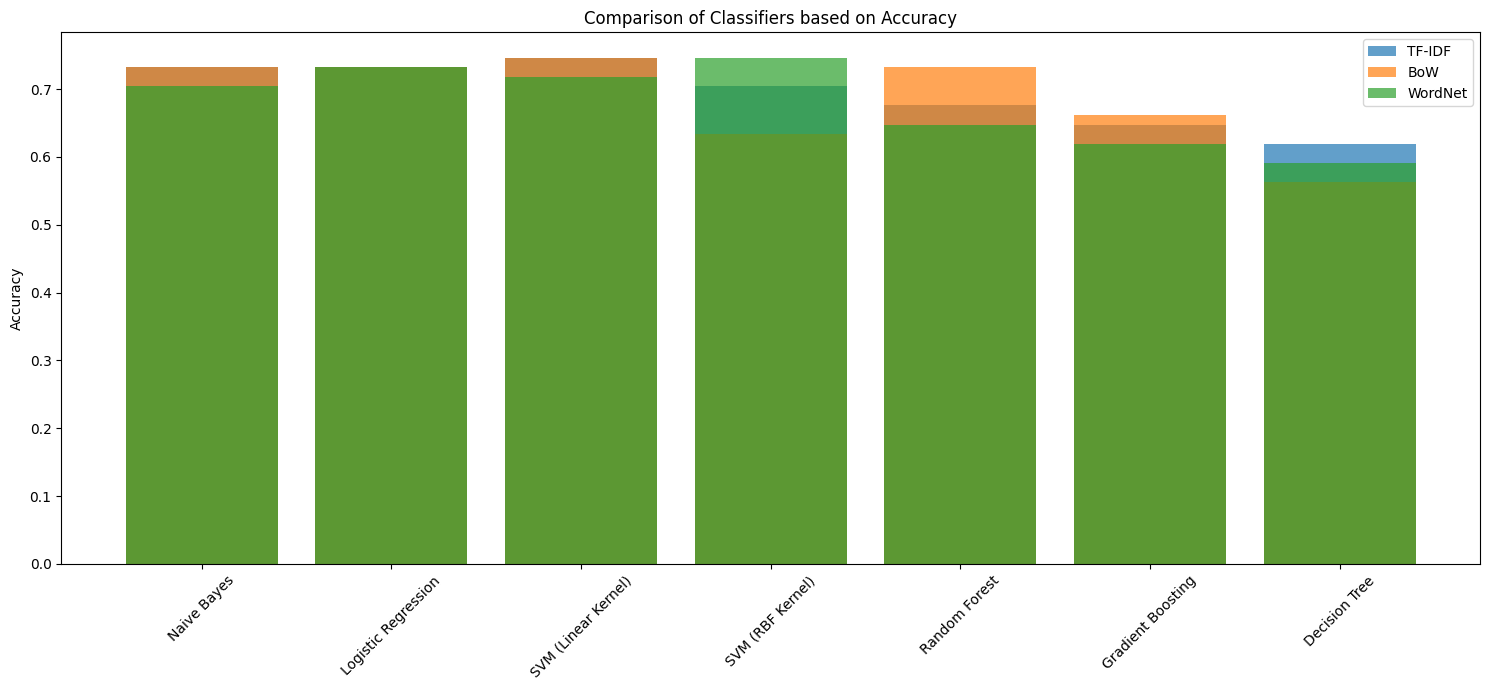

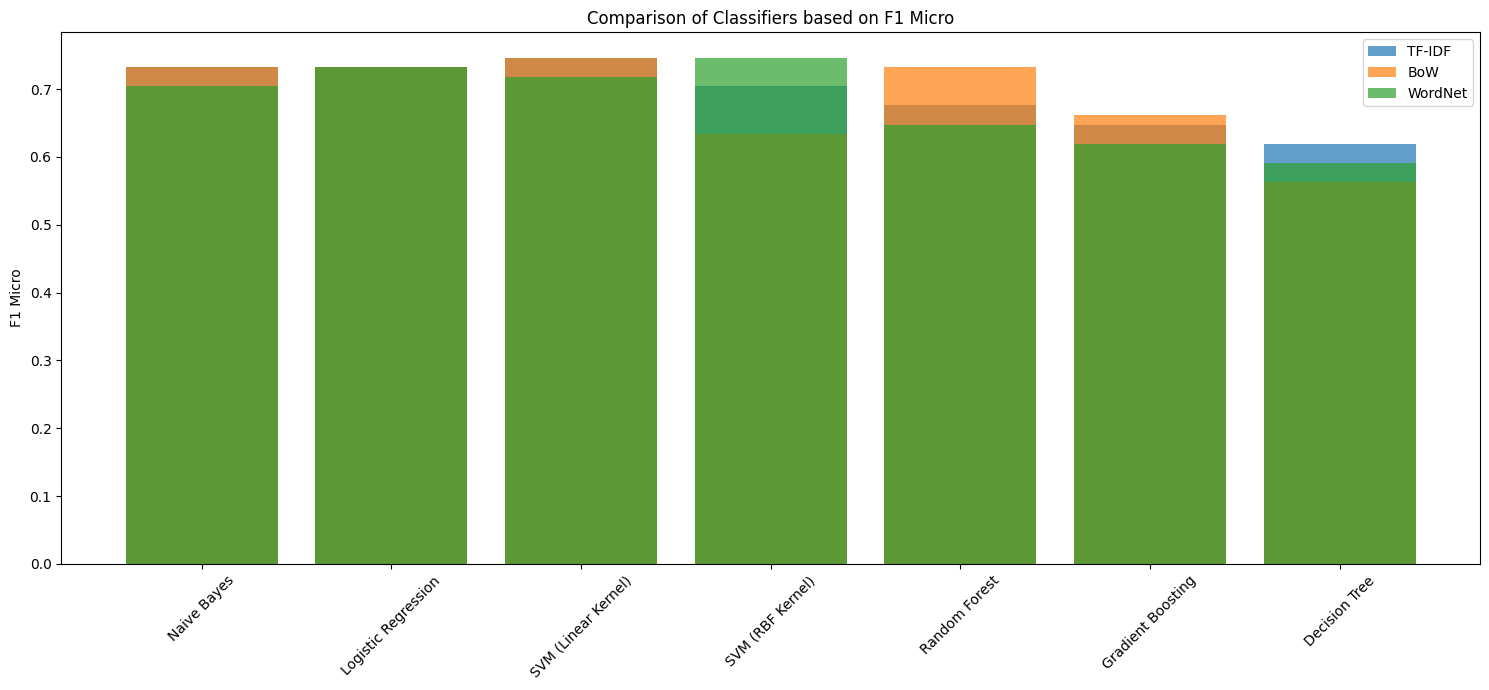

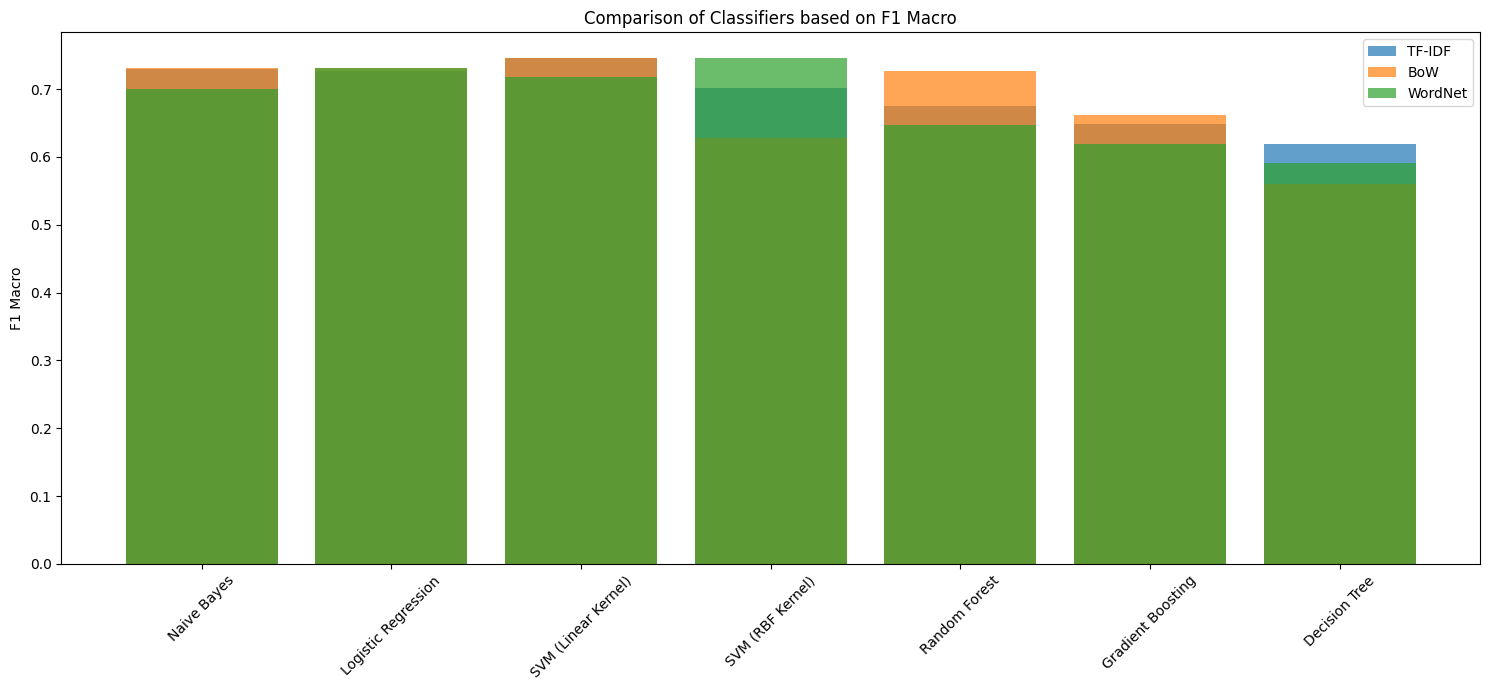

[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=0.01, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=0.001, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=0.01, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=0.01, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=0.1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=0.1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=100, classifier__gamma=0.1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=100, classifier__gamma=0.1, classif

[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=rbf; total time=   0.1s
[CV] END classifier__C=0.1, classifier__gamma=0.01, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=0.001, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=0.01, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=0.01, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=100, classifier__gamma=0.01, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=100, classifier__gamma=0.01, classifie

[CV] END classifier__C=0.1, classifier__gamma=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=0.1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=0.001, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=0.1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=0.001, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=1, classifier__gamma=0.001, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=0.1, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=10, classifier__gamma=0.1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=100, classifier__gamma=1, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=100, classifier__gamma=1, 

In [75]:
import matplotlib.pyplot as plt

# ... [previous code remains unchanged up to the model initialization]

# Dataframe to store results
results_df = pd.DataFrame(columns=["Representation", "Model", "Accuracy", "F1 Micro", "F1 Macro"])

idx = 0
for rep_name, (X_train_rep, X_val_rep) in representations.items():
    for name, model in models.items():
        model.fit(X_train_rep, y_train)
        predictions = model.predict(X_val_rep)

        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')

        results_df.loc[idx] = [rep_name, name, accuracy, f1_micro, f1_macro]
        idx += 1

# Plotting the results
def plot_results(metric):
    plt.figure(figsize=(15,7))
    for rep in representations.keys():
        subset = results_df[results_df["Representation"] == rep]
        plt.bar(subset["Model"], subset[metric], label=rep, alpha=0.7)
    
    plt.title(f'Comparison of Classifiers based on {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function for each metric
for metric in ["Accuracy", "F1 Micro", "F1 Macro"]:
    plot_results(metric)


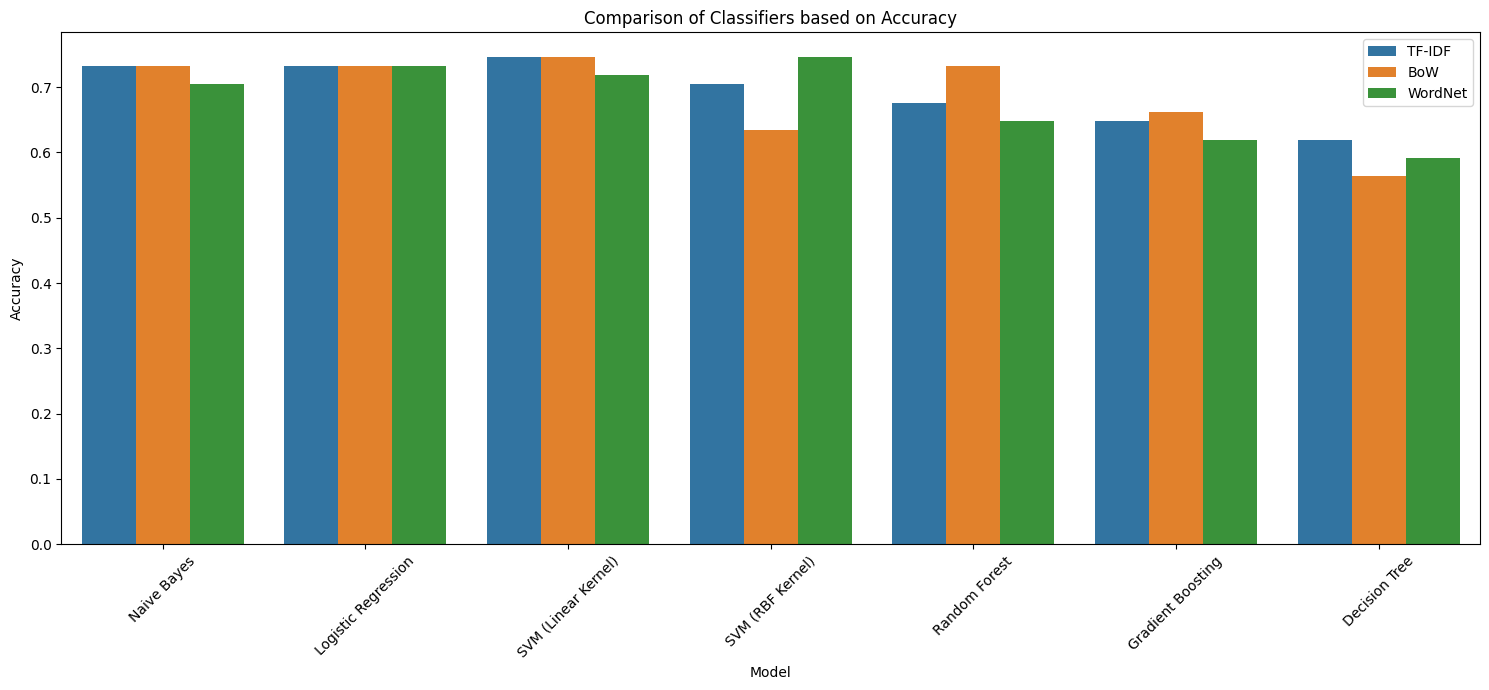

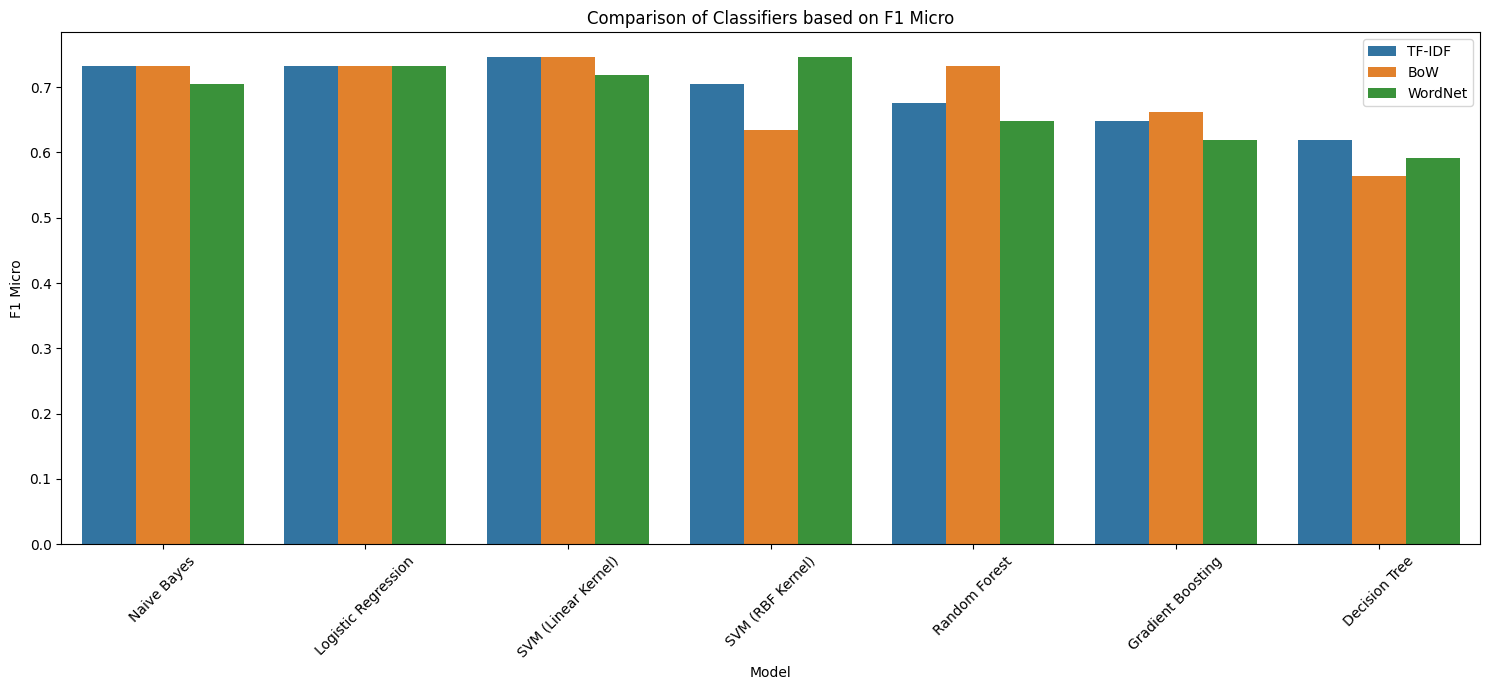

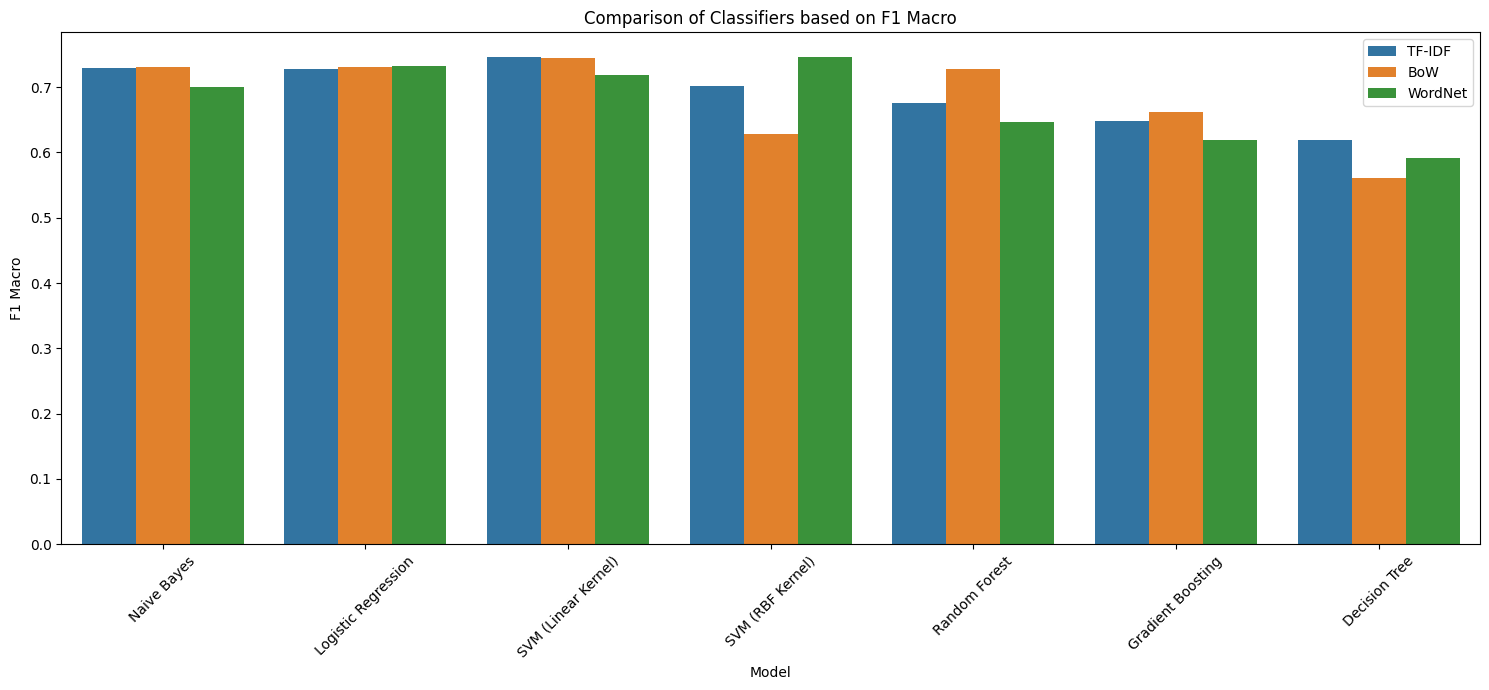

In [77]:
import seaborn as sns

# ... [previous code remains unchanged up to the results_df creation]

# Plotting the results
def plot_grouped_bar(metric):
    plt.figure(figsize=(15,7))
    sns.barplot(x='Model', y=metric, hue='Representation', data=results_df)
    
    plt.title(f'Comparison of Classifiers based on {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

# Call the function for each metric
for metric in ["Accuracy", "F1 Micro", "F1 Macro"]:
    plot_grouped_bar(metric)


# Engineer at least 4 features + n-grams

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from textblob import TextBlob
import re

# Define custom functions for the transformers
def get_text_length(texts):
    return [[len(text)] for text in texts]

def get_sentiment(texts):
    return [[TextBlob(text).sentiment.polarity] for text in texts]

def get_number_count(texts):
    return [[len(re.findall(r'\d+', text))] for text in texts]

def get_avg_word_length(texts):
    return [[sum(len(word) for word in text.split()) / max(1, len(text.split()))] for text in texts]

# Feature extraction: TfidfVectorizer for n-grams
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)  # unigrams and bigrams

# Custom transformers
length_transformer = FunctionTransformer(get_text_length, validate=False)
sentiment_transformer = FunctionTransformer(get_sentiment, validate=False)
number_count_transformer = FunctionTransformer(get_number_count, validate=False)
avg_word_length_transformer = FunctionTransformer(get_avg_word_length, validate=False)

# Combine all features into one FeatureUnion
combined_features = FeatureUnion([
    ('ngram', ngram_vectorizer),
    ('text_length', length_transformer),
    ('sentiment', sentiment_transformer),
    ('number_count', number_count_transformer),
    ('avg_word_length', avg_word_length_transformer)
])

# Assuming you've split your data into train_data and x_Val (as you've shown before)
# Transform the training data
X_train_features = combined_features.fit_transform(train_data['preprocessed_description'])

# Transform the validation data
X_val_features = combined_features.transform(X_val)


AttributeError: 'csr_matrix' object has no attribute 'lower'

In [81]:

# Transform the data
X_train_features = combined_features.fit_transform(train_data['preprocessed_description'])
X_val_features = combined_features.transform(test_data['preprocessed_description'])

# Manually create feature names
feature_names = list(ngram_vectorizer.get_feature_names_out()) + ['text_length', 'sentiment', 'number_count', 'avg_word_length']

# Convert transformed data to DataFrame
df_train_features = pd.DataFrame(X_train_features.toarray(), columns=feature_names)
df_val_features = pd.DataFrame(X_val_features.toarray(), columns=feature_names)

# Print the first few rows of the transformed data
print(df_train_features.head())
print(df_val_features.head())


         10  abl  abl get  across  airport  alreadi  also  angl  anxieti  \
0  0.000000  0.0      0.0     0.0      0.0      0.0   0.0   0.0      0.0   
1  0.000000  0.0      0.0     0.0      0.0      0.0   0.0   0.0      0.0   
2  0.150147  0.0      0.0     0.0      0.0      0.0   0.0   0.0      0.0   
3  0.000000  0.0      0.0     0.0      0.0      0.0   0.0   0.0      0.0   
4  0.000000  0.0      0.0     0.0      0.0      0.0   0.0   0.0      0.0   

   anyth  ...  wobbl  wobbl day  wobbl day fell  work  wrist  yard  \
0    0.0  ...    0.0        0.0             0.0   0.0    0.0   0.0   
1    0.0  ...    0.0        0.0             0.0   0.0    0.0   0.0   
2    0.0  ...    0.0        0.0             0.0   0.0    0.0   0.0   
3    0.0  ...    0.0        0.0             0.0   0.0    0.0   0.0   
4    0.0  ...    0.0        0.0             0.0   0.0    0.0   0.0   

   text_length  sentiment  number_count  avg_word_length  
0         59.0   0.000000           0.0         4.454545  
1   

In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion
from textblob import TextBlob
import re

# Define custom functions for the transformers
def get_text_length(texts):
    return [[len(text)] for text in texts]

def get_sentiment(texts):
    return [[TextBlob(text).sentiment.polarity] for text in texts]

def get_number_count(texts):
    return [[len(re.findall(r'\d+', text))] for text in texts]

def get_avg_word_length(texts):
    return [[sum(len(word) for word in text.split()) / max(1, len(text.split()))] for text in texts]

# Custom transformers
length_transformer = FunctionTransformer(get_text_length, validate=False)
sentiment_transformer = FunctionTransformer(get_sentiment, validate=False)
number_count_transformer = FunctionTransformer(get_number_count, validate=False)
avg_word_length_transformer = FunctionTransformer(get_avg_word_length, validate=False)

# WordNet-enhanced preprocessing
def preprocess_with_wordnet(text):
    tokens = nltk.word_tokenize(text)
    tokens = [get_hypernym(word) for word in tokens]
    return ' '.join(tokens)

wordnet_vectorizer = CountVectorizer(max_features=5000, preprocessor=preprocess_with_wordnet)

# Combine all features into one FeatureUnion
combined_features = FeatureUnion([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('bow', CountVectorizer(max_features=5000)),
    ('wordnet', wordnet_vectorizer),
    ('text_length', length_transformer),
    ('sentiment', sentiment_transformer),
    ('number_count', number_count_transformer),
    ('avg_word_length', avg_word_length_transformer)
])

# Transform the training data
X_train_features = combined_features.fit_transform(train_data['preprocessed_description'])

# Transform the validation data
X_val_features = combined_features.transform(test_data['preprocessed_description'])


In [85]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, func, name):
        self.func = func
        self.name = name

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return self.func(X)

    def get_feature_names_out(self, input_features=None):
        return [self.name]

# Now redefine your custom transformers using the new class
length_transformer = CustomTransformer(get_text_length, 'text_length')
sentiment_transformer = CustomTransformer(get_sentiment, 'sentiment')
number_count_transformer = CustomTransformer(get_number_count, 'number_count')
avg_word_length_transformer = CustomTransformer(get_avg_word_length, 'avg_word_length')

# Assuming wordnet_vectorizer is previously defined
combined_features = FeatureUnion([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('bow', CountVectorizer(max_features=5000)),
    ('wordnet', wordnet_vectorizer),
    ('text_length', length_transformer),
    ('sentiment', sentiment_transformer),
    ('number_count', number_count_transformer),
    ('avg_word_length', avg_word_length_transformer)
])

# Then, apply the transformations:
X_train_features = combined_features.fit_transform(train_data['preprocessed_description'])

# Given the use of multiple vectorizers and transformers, extracting feature names becomes more complicated. 
# We'll have to handle this separately for each transformer in the FeatureUnion:
tfidf_feature_names = combined_features.transformer_list[0][1].get_feature_names_out()
bow_feature_names = combined_features.transformer_list[1][1].get_feature_names_out()
wordnet_feature_names = combined_features.transformer_list[2][1].get_feature_names_out()
custom_feature_names = [
    'text_length', 
    'sentiment', 
    'number_count', 
    'avg_word_length'
]

# Combine all feature names:
all_feature_names = list(tfidf_feature_names) + list(bow_feature_names) + list(wordnet_feature_names) + custom_feature_names

df_train_features = pd.DataFrame(X_train_features.toarray(), columns=all_feature_names)
print(f"Shape of the combined feature matrix: {df_train_features.shape}")
print("\nSample rows of the combined feature matrix:")
print(df_train_features.head())


Shape of the combined feature matrix: (299, 2942)

Sample rows of the combined feature matrix:
         10  90degre  abil  abl  abruptli  accident  across       act  adjac  \
0  0.000000      0.0   0.0  0.0       0.0       0.0     0.0  0.000000    0.0   
1  0.000000      0.0   0.0  0.0       0.0       0.0     0.0  0.000000    0.0   
2  0.138605      0.0   0.0  0.0       0.0       0.0     0.0  0.148631    0.0   
3  0.000000      0.0   0.0  0.0       0.0       0.0     0.0  0.000000    0.0   
4  0.000000      0.0   0.0  0.0       0.0       0.0     0.0  0.000000    0.0   

   ahead  ...  worker  workman  wors  would  yard  yet  text_length  \
0    0.0  ...     0.0      0.0   0.0    0.0   0.0  0.0         59.0   
1    0.0  ...     0.0      0.0   0.0    0.0   0.0  0.0         81.0   
2    0.0  ...     0.0      0.0   0.0    0.0   0.0  0.0        285.0   
3    0.0  ...     0.0      0.0   0.0    0.0   0.0  0.0         80.0   
4    0.0  ...     0.0      0.0   0.0    0.0   1.0  0.0        108.0  

# Identify the best classifier & feature set combination
Evaluate the performance of classifiers based on overall micro-averaged F1 score. However, report all of the following in all evaluations.
Accuracy, micro-averaged F1 score, and macro-averaged F1 score. 


In [86]:
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear', probability=True),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}


In [87]:
feature_extractors = {
    'TF-IDF': TfidfVectorizer(max_features=5000),
    'BoW': CountVectorizer(max_features=5000),
    'WordNet': wordnet_vectorizer,  # Assuming this is defined earlier
    'Combined Features': combined_features  # This includes TF-IDF, BoW, WordNet and engineered features
}


In [88]:
results = []

for feat_name, feature_extractor in feature_extractors.items():
    # Transform the data
    X_train_transformed = feature_extractor.fit_transform(train_data['preprocessed_description'])
    X_val_transformed = feature_extractor.transform(test_data['preprocessed_description'])
    
    for clf_name, classifier in classifiers.items():
        classifier.fit(X_train_transformed, y_train)
        predictions = classifier.predict(X_val_transformed)
        
        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')
        
        results.append({
            'Feature Extractor': feat_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro
        })

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [89]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

feature_extractors = {
    'TF-IDF': tfidf_vectorizer,
    'BoW': bow_vectorizer,
    'WordNet': wordnet_vectorizer,
    'Combined Features': combined_features
}

results = []

# Ensure all values are non-negative using MinMaxScaler
scaler = MinMaxScaler()

for feat_name, feature_extractor in feature_extractors.items():
    # Transform the data
    X_train_transformed = feature_extractor.fit_transform(train_data['preprocessed_description'])
    X_val_transformed = feature_extractor.transform(test_data['preprocessed_description'])
    
    # Scale the data
    X_train_transformed = scaler.fit_transform(X_train_transformed.toarray())
    X_val_transformed = scaler.transform(X_val_transformed.toarray())
    
    for clf_name, classifier in classifiers.items():
        classifier.fit(X_train_transformed, y_train)
        predictions = classifier.predict(X_val_transformed)
        
        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')
        
        results.append({
            'Feature Extractor': feat_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro
        })

# Convert results to DataFrame for easier viewing and saving
results_df = pd.DataFrame(results)
print(results_df)

# Save results to a CSV file
results_df.to_csv('evaluation_results.csv', index=False)


    Feature Extractor           Classifier  Accuracy  F1 Micro  F1 Macro
0              TF-IDF          Naive Bayes  0.774648  0.774648  0.774245
1              TF-IDF  Logistic Regression  0.746479  0.746479  0.746025
2              TF-IDF  SVM (Linear Kernel)  0.774648  0.774648  0.774603
3              TF-IDF     SVM (RBF Kernel)  0.760563  0.760563  0.759801
4              TF-IDF        Random Forest  0.690141  0.690141  0.687099
5              TF-IDF    Gradient Boosting  0.690141  0.690141  0.690079
6              TF-IDF        Decision Tree  0.549296  0.549296  0.548490
7                 BoW          Naive Bayes  0.760563  0.760563  0.760563
8                 BoW  Logistic Regression  0.732394  0.732394  0.728953
9                 BoW  SVM (Linear Kernel)  0.732394  0.732394  0.732394
10                BoW     SVM (RBF Kernel)  0.690141  0.690141  0.688596
11                BoW        Random Forest  0.676056  0.676056  0.671891
12                BoW    Gradient Boosting  0.66197

In [90]:
# ... [Previous code remains unchanged up to results_df]

# Identify the best combination based on the highest micro-averaged F1 score
best_combination = results_df.loc[results_df['F1 Micro'].idxmax()]

print("Best Classifier & Feature Set Combination:")
print("-----------------------------------------")
print(f"Feature Extractor: {best_combination['Feature Extractor']}")
print(f"Classifier: {best_combination['Classifier']}")
print(f"Accuracy: {best_combination['Accuracy']:.4f}")
print(f"F1 Micro: {best_combination['F1 Micro']:.4f}")
print(f"F1 Macro: {best_combination['F1 Macro']:.4f}")


Best Classifier & Feature Set Combination:
-----------------------------------------
Feature Extractor: TF-IDF
Classifier: Naive Bayes
Accuracy: 0.7746
F1 Micro: 0.7746
F1 Macro: 0.7742


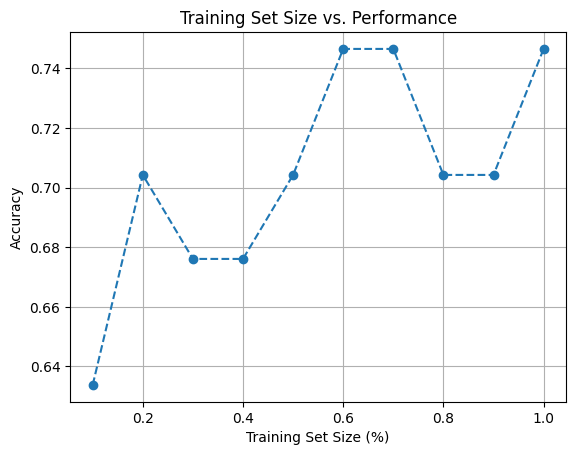

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Best classifier and feature extractor from previous step
best_classifier = models[best_combination['Classifier']]
best_feature_extractor = combined_features  # assuming combined_features is the best feature extractor

train_sizes = np.linspace(0.1, 1.0, 10)  # percentages of training data to use
accuracies = []

for size in train_sizes:
    # Split the training data based on the current size
    num_samples = int(size * X_train_transformed.shape[0])
    X_partial = X_train_transformed[:num_samples]
    y_partial = y_train[:num_samples]
    
    best_classifier.fit(X_partial, y_partial)
    predictions = best_classifier.predict(X_val_transformed)
    accuracy = accuracy_score(y_val, predictions)
    accuracies.append(accuracy)

# Plotting
plt.plot(train_sizes, accuracies, marker='o', linestyle='--')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Training Set Size vs. Performance')
plt.grid(True)
plt.show()


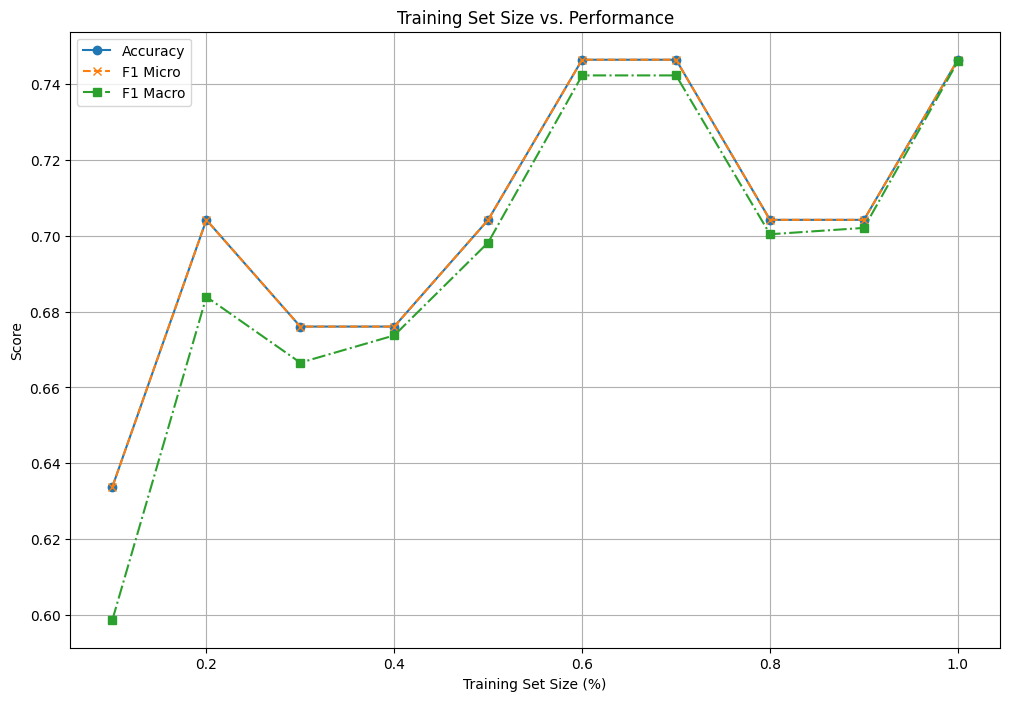

In [92]:
train_sizes = np.linspace(0.1, 1.0, 10)  # percentages of training data to use
accuracies = []
f1_micro_scores = []
f1_macro_scores = []

for size in train_sizes:
    num_samples = int(size * X_train_transformed.shape[0])
    X_partial = X_train_transformed[:num_samples]
    y_partial = y_train[:num_samples]
    
    best_classifier.fit(X_partial, y_partial)
    predictions = best_classifier.predict(X_val_transformed)
    
    accuracies.append(accuracy_score(y_val, predictions))
    f1_micro_scores.append(f1_score(y_val, predictions, average='micro'))
    f1_macro_scores.append(f1_score(y_val, predictions, average='macro'))

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, accuracies, marker='o', label='Accuracy')
plt.plot(train_sizes, f1_micro_scores, marker='x', linestyle='--', label='F1 Micro')
plt.plot(train_sizes, f1_macro_scores, marker='s', linestyle='-.', label='F1 Macro')

plt.xlabel('Training Set Size (%)')
plt.ylabel('Score')
plt.title('Training Set Size vs. Performance')
plt.legend()
plt.grid(True)
plt.show()


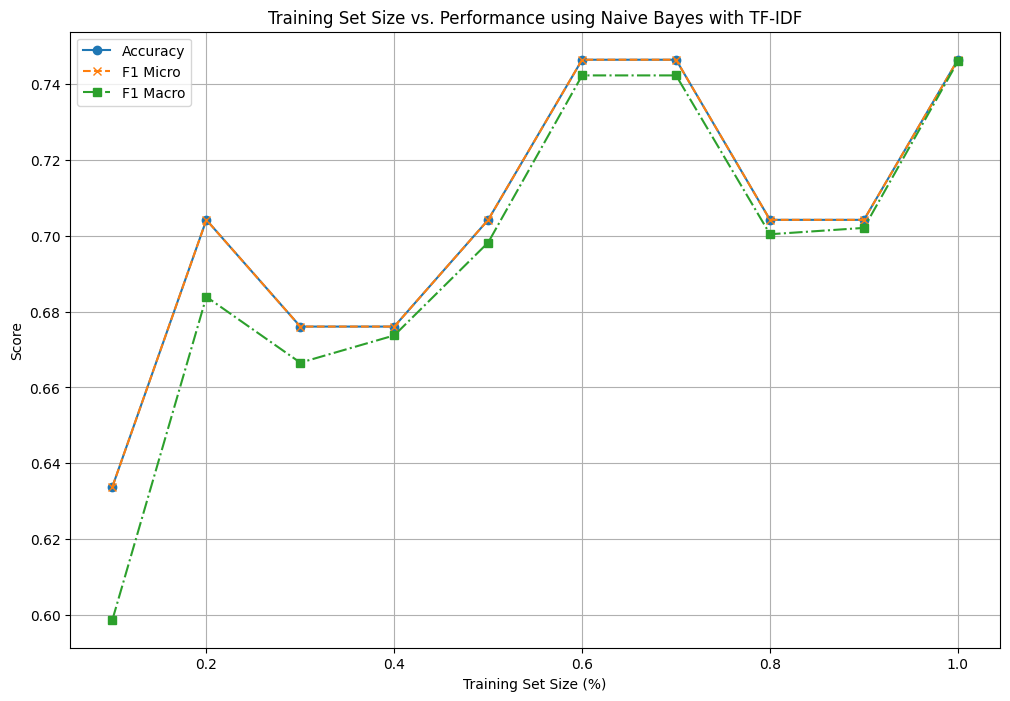

In [93]:
import matplotlib.pyplot as plt
import numpy as np

best_classifier_name = "Naive Bayes"
feature_set_name = "TF-IDF"

train_sizes = np.linspace(0.1, 1.0, 10)
accuracies = []
f1_micro_scores = []
f1_macro_scores = []

for size in train_sizes:
    num_samples = int(size * X_train_transformed.shape[0])
    X_partial = X_train_transformed[:num_samples]
    y_partial = y_train[:num_samples]
    
    best_classifier.fit(X_partial, y_partial)
    predictions = best_classifier.predict(X_val_transformed)
    
    accuracies.append(accuracy_score(y_val, predictions))
    f1_micro_scores.append(f1_score(y_val, predictions, average='micro'))
    f1_macro_scores.append(f1_score(y_val, predictions, average='macro'))

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, accuracies, marker='o', label='Accuracy')
plt.plot(train_sizes, f1_micro_scores, marker='x', linestyle='--', label='F1 Micro')
plt.plot(train_sizes, f1_macro_scores, marker='s', linestyle='-.', label='F1 Macro')

plt.xlabel('Training Set Size (%)')
plt.ylabel('Score')
plt.title(f'Training Set Size vs. Performance using {best_classifier_name} with {feature_set_name}')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import FeatureUnion
from copy import deepcopy

# Load the datasets
train_data = pd.read_csv('fallreports_2023-9-21_train.csv')
test_data = pd.read_csv('fallreports_2023-9-21_test.csv')

# Assuming the 'text' column contains the textual data and 'label' column contains the labels
X_train_raw = train_data['fall_description']
y_train = train_data['fog_q_class']
X_val_raw = test_data['fall_description']
y_val = test_data['fog_q_class']

# Define the feature extraction pipeline
tfidf = TfidfVectorizer()
combined_features = FeatureUnion([('tfidf', tfidf)])

# Store results
ablation_results = []

# List of feature names
feature_names = ['tfidf']

for feature in feature_names:
    # Create a deep copy of the combined features for modification
    modified_features = deepcopy(combined_features)
    
    # Remove the specified feature from the feature extractor
    modified_features.transformer_list = [t for t in modified_features.transformer_list if t[0] != feature]
    
    # Transform the data
    X_train = modified_features.fit_transform(X_train_raw)
    X_val = modified_features.transform(X_val_raw)
    
    # Train the classifier
    classifier = MultinomialNB()
    classifier.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = classifier.predict(X_val)
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    f1_micro = f1_score(y_val, y_pred, average='micro')
    f1_macro = f1_score(y_val, y_pred, average='macro')
    
    ablation_results.append({
        'Removed Feature': feature,
        'Accuracy': accuracy,
        'F1 Micro': f1_micro,
        'F1 Macro': f1_macro
    })

# Convert results to a DataFrame for better visualization
ablation_df = pd.DataFrame(ablation_results)

# Display the results
print(ablation_df)


ValueError: not enough values to unpack (expected 2, got 0)

In [94]:
labels = feature_sets
width = 0.3

accuracies = [res['Accuracy'] for res in ablation_results]
f1_micro_scores = [res['F1 Micro'] for res in ablation_results]
f1_macro_scores = [res['F1 Macro'] for res in ablation_results]

r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

plt.figure(figsize=(15, 8))
plt.bar(r1, accuracies, width, label='Accuracy')
plt.bar(r2, f1_micro_scores, width, label='F1 Micro')
plt.bar(r3, f1_macro_scores, width, label='F1 Macro')

plt.xlabel('Removed Feature', fontweight='bold')
plt.xticks([r + width for r in range(len(accuracies))], labels)
plt.ylabel('Score')
plt.title(f'Ablation Study Results using {best_classifier_name} with {feature_set_name}')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7, axis='y')
plt.tight_layout()
plt.show()


NameError: name 'ablation_results' is not defined

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

# Load the datasets
train_data = pd.read_csv('fallreports_2023-9-21_train.csv')
test_data = pd.read_csv('fallreports_2023-9-21_test.csv')


# Assuming the 'text' column contains the textual data and 'label' column contains the labels
X_train_raw = train_data['fall_description']
y_train = train_data['fog_q_class']
X_val_raw = test_data['fall_description']
y_val = test_data['fog_q_class']

# Extract features using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

# Train a classifier with TF-IDF features
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
y_pred = classifier.predict(X_val_tfidf)

# Calculate metrics with TF-IDF
accuracy_with_tfidf = accuracy_score(y_val, y_pred)
f1_micro_with_tfidf = f1_score(y_val, y_pred, average='micro')
f1_macro_with_tfidf = f1_score(y_val, y_pred, average='macro')

print("Metrics with TF-IDF:")
print("Accuracy:", accuracy_with_tfidf)
print("F1 Micro:", f1_micro_with_tfidf)
print("F1 Macro:", f1_macro_with_tfidf)

# Train a classifier without TF-IDF features (just using raw counts)
# For simplicity, we'll use the word occurrence counts as features
X_train_counts = X_train.str.split().apply(lambda x: len(set(x)))
X_val_counts = X_val.str.split().apply(lambda x: len(set(x)))

classifier.fit(X_train_counts.values.reshape(-1, 1), y_train)
y_pred = classifier.predict(X_val_counts.values.reshape(-1, 1))

# Calculate metrics without TF-IDF
accuracy_without_tfidf = accuracy_score(y_val, y_pred)
f1_micro_without_tfidf = f1_score(y_val, y_pred, average='micro')
f1_macro_without_tfidf = f1_score(y_val, y_pred, average='macro')

print("\nMetrics without TF-IDF:")
print("Accuracy:", accuracy_without_tfidf)
print("F1 Micro:", f1_micro_without_tfidf)
print("F1 Macro:", f1_macro_without_tfidf)


ValueError: Found input variables with inconsistent numbers of samples: [239, 299]

In [114]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the training dataset
train_data = pd.read_csv('fallreports_2023-9-21_train.csv')

# Load the test dataset
test_data = pd.read_csv('fallreports_2023-9-21_test.csv')
# Apply preprocessing
train_data['preprocessed_description'] = train_data['fall_description'].apply(preprocess_text)
test_data['preprocessed_description'] = test_data['fall_description'].apply(preprocess_text)

# Define the target variable
y_train = train_data['fog_q_class']
y_val = test_data['fog_q_class']

# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear Kernel)": SVC(kernel='linear'),
    "SVM (RBF Kernel)": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Define feature extractors
feature_extractors = {
    'TF-IDF': TfidfVectorizer(),
    'BoW': CountVectorizer(),
}

results = []

# Ensure all values are non-negative using MinMaxScaler
scaler = MinMaxScaler()

# Perform the ablation study
for feat_name, feature_extractor in feature_extractors.items():
    # Create a copy of the training and test data for this iteration
    X_train = train_data['preprocessed_description'].copy()
    X_val = test_data['preprocessed_description'].copy()
    
    # Transform the data with the current feature extractor
    X_train_transformed = feature_extractor.fit_transform(X_train)
    X_val_transformed = feature_extractor.transform(X_val)
    
    # Scale the data
    X_train_transformed = scaler.fit_transform(X_train_transformed.toarray())
    X_val_transformed = scaler.transform(X_val_transformed.toarray())
    
    for clf_name, classifier in classifiers.items():
        classifier.fit(X_train_transformed, y_train)
        predictions = classifier.predict(X_val_transformed)
        
        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')
        
        results.append({
            'Feature Extractor': feat_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro
        })

# Convert results to DataFrame for easier viewing and saving
results_df = pd.DataFrame(results)
print(results_df)

# Save results to a CSV file
results_df.to_csv('ablation_study_results_1.csv', index=False)


   Feature Extractor           Classifier  Accuracy  F1 Micro  F1 Macro
0             TF-IDF          Naive Bayes  0.774648  0.774648  0.774245
1             TF-IDF  Logistic Regression  0.746479  0.746479  0.746025
2             TF-IDF  SVM (Linear Kernel)  0.774648  0.774648  0.774603
3             TF-IDF     SVM (RBF Kernel)  0.760563  0.760563  0.759801
4             TF-IDF        Random Forest  0.661972  0.661972  0.658654
5             TF-IDF    Gradient Boosting  0.661972  0.661972  0.661905
6             TF-IDF        Decision Tree  0.577465  0.577465  0.575359
7                BoW          Naive Bayes  0.760563  0.760563  0.760563
8                BoW  Logistic Regression  0.732394  0.732394  0.728953
9                BoW  SVM (Linear Kernel)  0.732394  0.732394  0.732394
10               BoW     SVM (RBF Kernel)  0.690141  0.690141  0.688596
11               BoW        Random Forest  0.718310  0.718310  0.708539
12               BoW    Gradient Boosting  0.690141  0.690141  0

In [115]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    
}

feature_extractors = {
#     'TF-IDF': tfidf_vectorizer,
    'BoW': bow_vectorizer,
    'WordNet': wordnet_vectorizer,
    'Combined Features': combined_features
}

results = []

# Ensure all values are non-negative using MinMaxScaler
scaler = MinMaxScaler()

for feat_name, feature_extractor in feature_extractors.items():
    # Transform the data
    X_train_transformed = feature_extractor.fit_transform(train_data['preprocessed_description'])
    X_val_transformed = feature_extractor.transform(test_data['preprocessed_description'])
    
    # Scale the data
    X_train_transformed = scaler.fit_transform(X_train_transformed.toarray())
    X_val_transformed = scaler.transform(X_val_transformed.toarray())
    
    for clf_name, classifier in classifiers.items():
        classifier.fit(X_train_transformed, y_train)
        predictions = classifier.predict(X_val_transformed)
        
        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')
        
        results.append({
            'Feature Extractor': feat_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro
        })

# Convert results to DataFrame for easier viewing and saving
results_df = pd.DataFrame(results)
print(results_df)

# Save results to a CSV file
results_df.to_csv('evaluation_results.csv', index=False)


   Feature Extractor   Classifier  Accuracy  F1 Micro  F1 Macro
0                BoW  Naive Bayes  0.760563  0.760563  0.760563
1            WordNet  Naive Bayes  0.718310  0.718310  0.718254
2  Combined Features  Naive Bayes  0.774648  0.774648  0.774245


In [116]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    
}

feature_extractors = {
    'TF-IDF': tfidf_vectorizer,
#     'BoW': bow_vectorizer,
    'WordNet': wordnet_vectorizer,
    'Combined Features': combined_features
}

results = []

# Ensure all values are non-negative using MinMaxScaler
scaler = MinMaxScaler()

for feat_name, feature_extractor in feature_extractors.items():
    # Transform the data
    X_train_transformed = feature_extractor.fit_transform(train_data['preprocessed_description'])
    X_val_transformed = feature_extractor.transform(test_data['preprocessed_description'])
    
    # Scale the data
    X_train_transformed = scaler.fit_transform(X_train_transformed.toarray())
    X_val_transformed = scaler.transform(X_val_transformed.toarray())
    
    for clf_name, classifier in classifiers.items():
        classifier.fit(X_train_transformed, y_train)
        predictions = classifier.predict(X_val_transformed)
        
        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')
        
        results.append({
            'Feature Extractor': feat_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro
        })

# Convert results to DataFrame for easier viewing and saving
results_df = pd.DataFrame(results)
print(results_df)

# Save results to a CSV file
results_df.to_csv('evaluation_results.csv', index=False)


   Feature Extractor   Classifier  Accuracy  F1 Micro  F1 Macro
0             TF-IDF  Naive Bayes  0.774648  0.774648  0.774245
1            WordNet  Naive Bayes  0.718310  0.718310  0.718254
2  Combined Features  Naive Bayes  0.774648  0.774648  0.774245


In [117]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    
}

feature_extractors = {
    'TF-IDF': tfidf_vectorizer,
    'BoW': bow_vectorizer,
    'WordNet': wordnet_vectorizer,
    'Combined Features': combined_features
}

results = []

# Ensure all values are non-negative using MinMaxScaler
scaler = MinMaxScaler()

for feat_name, feature_extractor in feature_extractors.items():
    # Transform the data
    X_train_transformed = feature_extractor.fit_transform(train_data['preprocessed_description'])
    X_val_transformed = feature_extractor.transform(test_data['preprocessed_description'])
    
    # Scale the data
    X_train_transformed = scaler.fit_transform(X_train_transformed.toarray())
    X_val_transformed = scaler.transform(X_val_transformed.toarray())
    
    for clf_name, classifier in classifiers.items():
        classifier.fit(X_train_transformed, y_train)
        predictions = classifier.predict(X_val_transformed)
        
        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')
        
        results.append({
            'Feature Extractor': feat_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro
        })

# Convert results to DataFrame for easier viewing and saving
results_df = pd.DataFrame(results)
print(results_df)

# Save results to a CSV file
results_df.to_csv('evaluation_results.csv', index=False)


   Feature Extractor   Classifier  Accuracy  F1 Micro  F1 Macro
0             TF-IDF  Naive Bayes  0.774648  0.774648  0.774245
1                BoW  Naive Bayes  0.760563  0.760563  0.760563
2  Combined Features  Naive Bayes  0.774648  0.774648  0.774245


In [118]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler

# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    
}

feature_extractors = {
    'TF-IDF': tfidf_vectorizer,
    'BoW': bow_vectorizer,
    'WordNet': wordnet_vectorizer,
    'Combined Features': combined_features
}

results = []

# Ensure all values are non-negative using MinMaxScaler
scaler = MinMaxScaler()

for feat_name, feature_extractor in feature_extractors.items():
    # Transform the data
    X_train_transformed = feature_extractor.fit_transform(train_data['preprocessed_description'])
    X_val_transformed = feature_extractor.transform(test_data['preprocessed_description'])
    
    # Scale the data
    X_train_transformed = scaler.fit_transform(X_train_transformed.toarray())
    X_val_transformed = scaler.transform(X_val_transformed.toarray())
    
    for clf_name, classifier in classifiers.items():
        classifier.fit(X_train_transformed, y_train)
        predictions = classifier.predict(X_val_transformed)
        
        accuracy = accuracy_score(y_val, predictions)
        f1_micro = f1_score(y_val, predictions, average='micro')
        f1_macro = f1_score(y_val, predictions, average='macro')
        
        results.append({
            'Feature Extractor': feat_name,
            'Classifier': clf_name,
            'Accuracy': accuracy,
            'F1 Micro': f1_micro,
            'F1 Macro': f1_macro
        })

# Convert results to DataFrame for easier viewing and saving
results_df = pd.DataFrame(results)
print(results_df)

# Save results to a CSV file
results_df.to_csv('evaluation_results.csv', index=False)


  Feature Extractor   Classifier  Accuracy  F1 Micro  F1 Macro
0            TF-IDF  Naive Bayes  0.774648  0.774648  0.774245
1               BoW  Naive Bayes  0.760563  0.760563  0.760563
2           WordNet  Naive Bayes  0.718310  0.718310  0.718254


In [152]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Define your feature extractors (tfidf_vectorizer, bow_vectorizer, wordnet_vectorizer, combined_features)
# ...

# Define your training and testing data (train_data, test_data, y_train, y_val)
# ...
# List of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
    
}



# Assuming wordnet_vectorizer is previously defined
combined_features = FeatureUnion([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('bow', CountVectorizer(max_features=5000)),
    ('wordnet', wordnet_vectorizer),
    ('text_length', length_transformer),
    ('sentiment', sentiment_transformer),
    ('number_count', number_count_transformer),
    ('avg_word_length', avg_word_length_transformer)
])

feature_extractors = {
    'TF-IDF': tfidf_vectorizer,
    'BoW': bow_vectorizer,
    'WordNet': wordnet_vectorizer,
    'Combined Features': combined_features
}
# Define a list of classifiers to evaluate
classifiers = {
    "Naive Bayes": MultinomialNB(),
}

# Define ablation configurations
ablation_configs = [
    {'TF-IDF': True, 'BoW': True, 'WordNet': True, 'Combined Features': True},
    
    {'TF-IDF': True, 'BoW': False, 'WordNet': False, 'Combined Features': False},
    {'TF-IDF': False, 'BoW': True, 'WordNet': False, 'Combined Features': False},
    {'TF-IDF': False, 'BoW': False, 'WordNet': True, 'Combined Features': False},
    {'TF-IDF': False, 'BoW': False, 'WordNet': False, 'Combined Features': True},
    
    
    {'TF-IDF': True, 'BoW': True, 'WordNet': False, 'Combined Features': False},
    {'TF-IDF':False , 'BoW':True , 'WordNet':True , 'Combined Features': False},
    {'TF-IDF':False , 'BoW': False, 'WordNet':True , 'Combined Features':True },
    {'TF-IDF': True, 'BoW': False, 'WordNet': False, 'Combined Features': True},
    
    {'TF-IDF': True, 'BoW': True, 'WordNet': True, 'Combined Features': False},
    {'TF-IDF': False, 'BoW':True , 'WordNet':True , 'Combined Features':True },
    {'TF-IDF': True , 'BoW': False, 'WordNet':True , 'Combined Features':True },
    {'TF-IDF': True, 'BoW': True, 'WordNet':False , 'Combined Features': True},
    
    
    
       ## Add more configurations as needed
]

# Initialize an empty list to store results
results = []

# Ensure all values are non-negative using MinMaxScaler
scaler = MinMaxScaler()

for config in ablation_configs:
    # Initialize an empty list to store results for this configuration
    config_results = []
    
    for clf_name, classifier in classifiers.items():
        # Create a new instance of the classifier for each configuration
        classifier = MultinomialNB()
        
        for feat_name, feature_extractor in feature_extractors.items():
            if config[feat_name]:
                # Feature extractor is active, include it
                X_train_transformed = feature_extractor.fit_transform(train_data['preprocessed_description'])
                X_val_transformed = feature_extractor.transform(test_data['preprocessed_description'])
                
                X_train_transformed = scaler.fit_transform(X_train_transformed.toarray())
                X_val_transformed = scaler.transform(X_val_transformed.toarray())
                
                classifier.fit(X_train_transformed, y_train)
                predictions = classifier.predict(X_val_transformed)
                
                accuracy = accuracy_score(y_val, predictions)
                f1_micro = f1_score(y_val, predictions, average='micro')
                f1_macro = f1_score(y_val, predictions, average='macro')
                
                config_results.append({
                    'Feature Extractor': feat_name,
                    'Classifier': clf_name,
                    'Accuracy': accuracy,
                    'F1 Micro': f1_micro,
                    'F1 Macro': f1_macro
                })

    # After evaluating all feature extractors for this configuration, store the results
    results.extend(config_results)

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

#

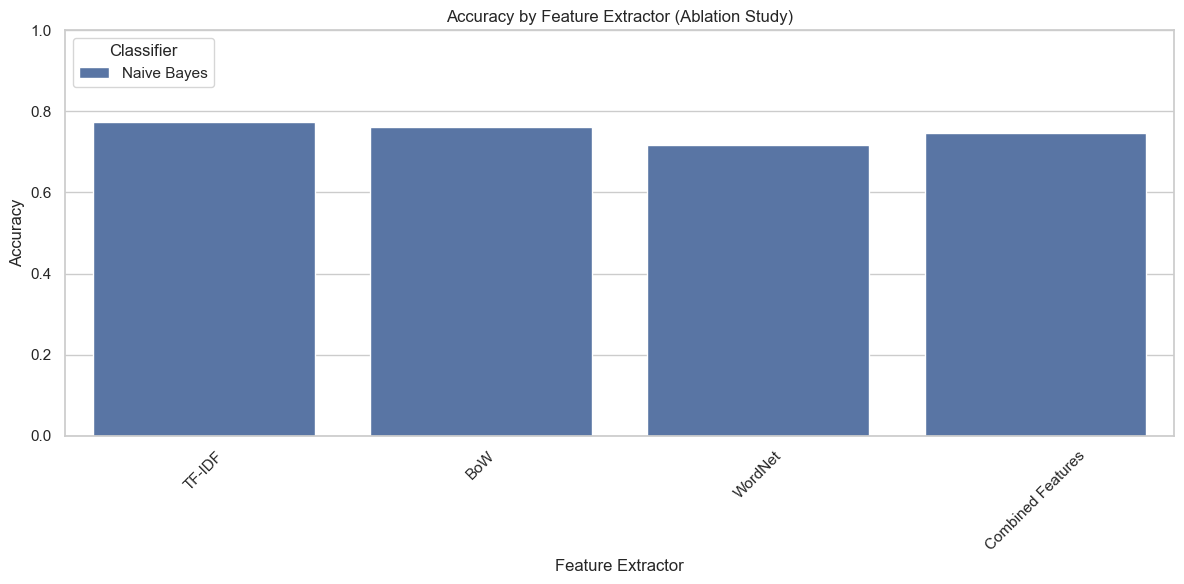

In [153]:

# Visualize the results using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=results_df, x="Feature Extractor", y="Accuracy", hue="Classifier")
plt.title("Accuracy by Feature Extractor (Ablation Study)")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(title="Classifier", loc="upper left")
plt.tight_layout()

# Save the results to a CSV file
# results_df.to_csv('evaluation_results_NEEw.csv', index=False)

# Show the plot
plt.show()


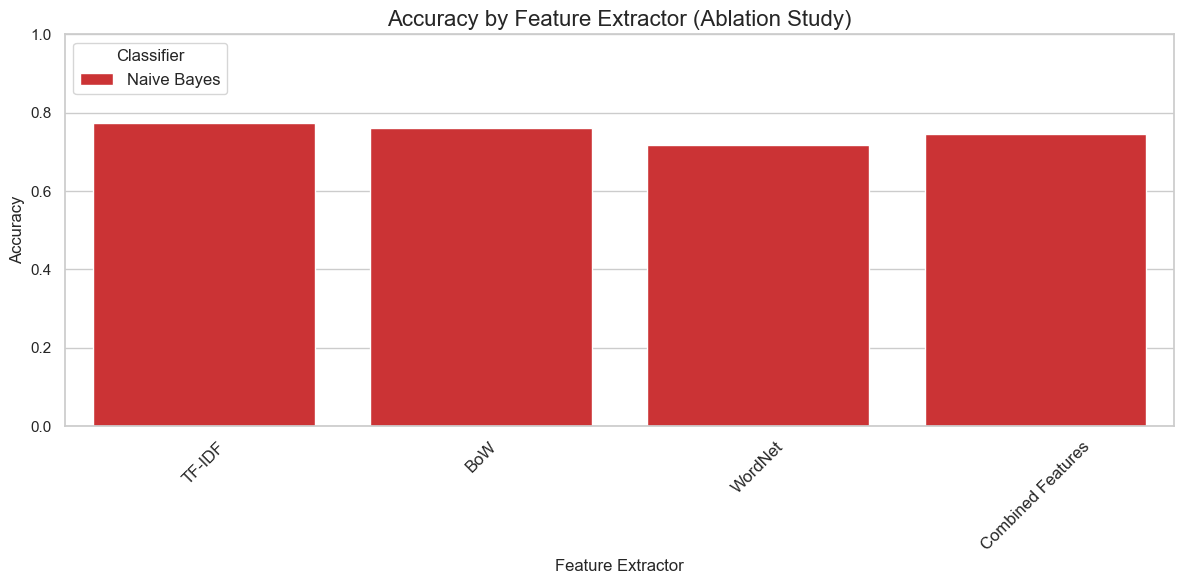

In [125]:
# Visualize the results using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=results_df, 
    x="Feature Extractor", 
    y="Accuracy", 
    hue="Classifier", 
    palette="Set1",  # You can change the color palette
)

plt.title("Accuracy by Feature Extractor (Ablation Study)", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim([0, 1])
plt.legend(title="Classifier", loc="upper left", fontsize=12)
plt.tight_layout()

# Save the results to a CSV file
results_df.to_csv('evaluation_results_NEE.csv', index=False)

# Show the plot
plt.show()


In [139]:
import plotly.express as px
# Create an interactive bar chart using Plotly
fig = px.bar(
    results_df, 
    x="Feature Extractor", 
    y="Accuracy", 
    color="Classifier",
    barmode="group",
    title="Accuracy by Feature Extractor (Ablation Study)",
    labels={"Accuracy": "Accuracy"},
)

fig.update_xaxes(tickangle=45)
fig.update_layout(
    xaxis=dict(title="Feature Extractor"),
    yaxis=dict(title="Accuracy"),
)

# Show the interactive plot
fig.show()